# Alineamiento de diferentes secuencias de un mismo locus con Biopython

In [1]:
import os, pylab
from Bio.Align.Applications import ClustalwCommandline
from Bio import pairwise2, SeqIO, AlignIO, Phylo


In [2]:
pwd

'/Users/migueldelrio/Desktop/bioinformatica2019/jupyter'

In [3]:
cd ../data/fasta/

/Users/migueldelrio/Desktop/bioinformatica2019/data/fasta


In [5]:
# visualización de los nombres de las secuencias

f= open("secuencias10.fasta")
n=0
secuencias=[]
for rec in SeqIO.parse(f, "fasta"):
    print (rec.id, "\t", rec.description)

PET1.8F 	 PET1.8F
PHBb1.2F 	 PHBb1.2F
PET1.2F 	 PET1.2F
Nav2.2F 	 Nav2.2F
PETsn1.2F 	 PETsn1.2F
Nav1.8F 	 Nav1.8F
PET2.8F 	 PET2.8F
PETsn1.8F 	 PETsn1.8F
Nav1.2F 	 Nav1.2F
PET2.2F 	 PET2.2F


# Alineamiento

In [8]:
# es necesario saber en qué directorio se localiza el programa clustalw2 que se instaló con conda
# la mac mdelrio
clustalw_exe = r"/Users/migueldelrio/Desktop/analisis/scripts/clustalw2"
clustalw_cline = ClustalwCommandline(clustalw_exe, infile="secuencias10.fasta")
assert os.path.isfile(clustalw_exe), "Clustal W executable missing"
stdout, stderr = clustalw_cline()

#### Se verifica la presencia de los archivos .aln y .dnd

In [9]:
ls 

Nav1.2F.fa          PET1.2F.fasta       PETsn1.2F.fasta     secuencias10.dnd
Nav1.2F.fasta       PET1.8F.fasta       PETsn1.8F.fasta     secuencias10.fasta
Nav1.8F.fasta       PET2.2F.fasta       PHBb1.2F.fasta
Nav2.2F.fasta       PET2.8F.fasta       secuencias10.aln


In [10]:
# para visualizar el alineamiento se ve el contenido del archivo .aln
alignments = AlignIO.parse("secuencias10.aln", "clustal")
for alignment in alignments:
    print(alignment)
    print("")

SingleLetterAlphabet() alignment with 10 rows and 346 columns
--------------------CCCCCAGTCATGAA-TCACACCGT...--- PET1.8F
---------------ACTTCACCCCAGTCATGAA-TCACACCGT...--- PET1.2F
-----------------TTCACCCCAGTCATGAA-ACACAAAGT...--- PETsn1.2F
-------------------CACCCCAGTCATGAA-ACACAAAGT...TAA PET2.2F
------------------TTCCCCCTTTCATGAA-ACACAAAGT...T-- Nav2.2F
GGATTTTGCCGGCTTCTCTCTCCTATTTCATGTATACACAAAGT...TA- PETsn1.8F
------------------TTCCCCCAGTCATGAT-ACACAAAGT...T-- PET2.8F
---------------ACTTC-CCCCAATCATCTG-TCCCACCTT...--- Nav1.8F
----------------CTTC-CCCCAATCATCTG-TCCCACCTT...--- Nav1.2F
------------TCGACTTCACCCCAGTCGCTGA-TCCTACCGT...--- PHBb1.2F



In [11]:
# para visualizar el árbol generado en formato ascii, se ve el contenido del archivo .dnd
tree = Phylo.read("secuencias10.dnd", "newick")
Phylo.draw_ascii(tree, file=None, column_width=80)

                       ___ PET1.8F
                     ,|
                     ||____ PET1.2F
    _________________|
   |                 |             ____________ PHBb1.2F
   |                 |____________|
  _|                              |                  __ Nav1.8F
 | |                              |_________________|
 | |                                                |______________ Nav1.2F
 | |
 | | PET2.8F
 |
 | , Nav2.2F
_|_|
 | |__ PETsn1.8F
 |
 | PETsn1.2F
 |
 | PET2.2F



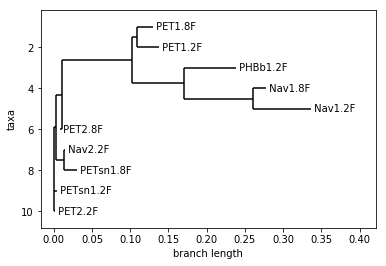

In [12]:
# La visualización del arbol en formato 
tree.rooted = True
Phylo.draw(tree)

### En caso de observar un mensaje parecido a 
`<Figure size 640x480 with 1 Axes>`
### es necesario ejecutar de nuevo la celda